# Simulações Deposição Aleatória Relaxacao Superficial - 16 amostras

In [ ]:
# importação dos objetos
from deposicao import DeposicaoAleatoriaRelaxacaoSuperficial
from rng import RNG_PCG
import numpy as np
import pdb
import time
from multiprocessing import Pool

def simular(deposicao):
    deposicao.simular()
    return deposicao

instancias_paralelas = 4
amostras = 16 * instancias_paralelas
tempo_maximo = 2 * 10 ** 5
comprimentos_subestratos = [1600] #, 200, 400]
z = 2
coeficiente_tempo_maximo = 1.1
fracao_tempo_maximo = 100

dados_medios = {
    L:  {
        'interfaces': np.zeros(L),
        'tempo_maximo': max([tempo_maximo, round(coeficiente_tempo_maximo * (L ** z))]),
        'snapshots': max([
                        tempo_maximo // fracao_tempo_maximo,
                        round((coeficiente_tempo_maximo * (L ** z)) // fracao_tempo_maximo)
                     ]),
        'evolucao_subestratos': np.zeros((
                                    max([
                                       tempo_maximo // fracao_tempo_maximo,
                                       round((coeficiente_tempo_maximo * (L ** z)) // fracao_tempo_maximo)
                                    ]),
                                    L
                                )),
        'rugosidades': np.zeros((
                           max([
                              tempo_maximo // fracao_tempo_maximo,
                              round((coeficiente_tempo_maximo * (L ** z)) // fracao_tempo_maximo)
                           ])
                       ))
    }
    for L in comprimentos_subestratos
}

# instanciando geradores de numeros aleatorios
rngs = [RNG_PCG() for i in range(instancias_paralelas)]

for L in comprimentos_subestratos:
    tempo_maximo = dados_medios[L]['tempo_maximo']
    snapshots = dados_medios[L]['snapshots']
    
    # avancar o estado dos geradores de numeros aleatorios para cada instancia
    for i in range(1, instancias_paralelas):
        rngs[i].fast_forward(i * tempo_maximo)
    
    future_steps = 1
    for amostra in range(0,amostras,instancias_paralelas):
        # instancio instancias_paralelas de objetos de deposicao aleatoria
        instancias = []
        for i in range(instancias_paralelas):
            instancias.append(
                DeposicaoAleatoriaRelaxacaoSuperficial(i, L, rngs[i], tempo_maximo = tempo_maximo, snapshots = snapshots )
            )
        
        begin = time.time()
        # simulacao de instancias_paralelas deposicoes
        print('Simulacao das amostras {} a {}'.format(amostra + 1, amostra + instancias_paralelas))
        pool = Pool()
        deposicoes = pool.map(simular, instancias)
        pool.close()
        pool.join()
        print('Tempo Gasto: {:.2f}s'.format(time.time() - begin))
        
        # armazenar resultados
        for d in deposicoes:
            dados_medios[L]['evolucao_subestratos'] += d.altura_sitios / amostras
            dados_medios[L]['interfaces'] += d.altura_interface / amostras
            dados_medios[L]['rugosidades'] += d.rugosidade() / amostras
        
        # avancar geradores de numeros aleatorios
        for i in range(instancias_paralelas):
            rngs[i].fast_forward((i + future_steps * instancias_paralelas) * tempo_maximo)
        future_steps += 1

Simulacao das amostras 1 a 4
Instancia 0, 0.0%, 0.00s
Instancia 1, 0.0%, 0.00s
Instancia 2, 0.0%, 0.00s
Instancia 3, 0.0%, 0.00s
Instancia 0, 5.0%, 10.44s
Instancia 1, 5.0%, 10.63s
Instancia 2, 5.0%, 10.85s
Instancia 3, 5.0%, 10.64s
Instancia 0, 10.0%, 22.23s
Instancia 1, 10.0%, 22.41s
Instancia 2, 10.0%, 22.88s
Instancia 3, 10.0%, 22.92s
Instancia 0, 15.0%, 34.76s
Instancia 1, 15.0%, 34.32s
Instancia 2, 15.0%, 34.98s
Instancia 3, 15.0%, 35.44s
Instancia 1, 20.0%, 49.40s
Instancia 0, 20.0%, 50.39s
Instancia 3, 20.0%, 49.90s
Instancia 2, 20.0%, 50.78s
Instancia 0, 25.0%, 65.13s
Instancia 1, 25.0%, 64.74s
Instancia 3, 25.0%, 64.25s
Instancia 2, 25.0%, 65.77s
Instancia 0, 30.0%, 79.53s
Instancia 1, 30.0%, 80.47s
Instancia 3, 30.0%, 80.20s
Instancia 2, 30.0%, 81.45s
Instancia 0, 35.0%, 95.16s
Instancia 1, 35.0%, 95.50s
Instancia 3, 35.0%, 95.52s
Instancia 2, 35.0%, 97.19s
Instancia 0, 40.0%, 110.00s
Instancia 1, 40.0%, 109.51s
Instancia 3, 40.0%, 109.91s
Instancia 2, 40.0%, 111.69s
Instanc

## Gráfico da Média da Evolução do Crescimento de Subestratos - Deposição Aleatória com Relaxação Superficial

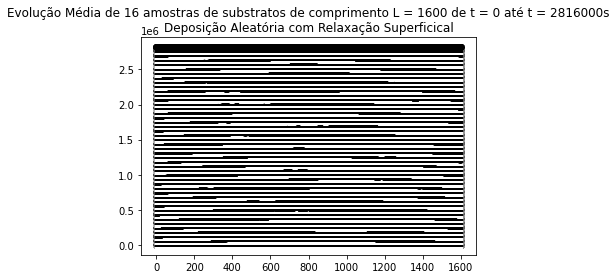

In [2]:
from simulacao_utils import plotar_interface, plotar_rugosidades, plotar_instantaneos

comutar_representacao = lambda r: 'wo' if r == 'ko' else 'ko'

t_comutacao = 1
for L in comprimentos_subestratos:
    plotar_instantaneos(
        'Evolução Média de {} amostras de substratos de comprimento L = {} de t = 0 até t = {}s\n'.format(
            amostras,
            L,
            dados_medios[L]['tempo_maximo']
        )
      + 'Deposição Aleatória com Relaxação Superficical',
        dados_medios[L]['interfaces'],
        [dados_medios[L]['evolucao_subestratos'][t] for t in range(dados_medios[L]['snapshots'])],
        t_comutacao = t_comutacao,
        comutar_representacao = comutar_representacao
    )

## Média das Rugosidades em Função do Tempo - Deposição Aleatória com Relaxação Superficial

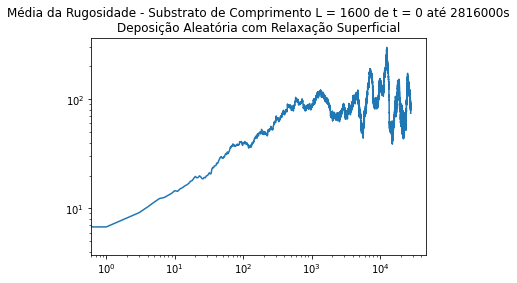

In [3]:
for L in comprimentos_subestratos:
    plotar_rugosidades('Média da Rugosidade - Substrato de Comprimento L = {} de t = 0 até {}s\n'.format(L, dados_medios[L]['tempo_maximo'])
                     + 'Deposição Aleatória com Relaxação Superficial',
                      [dados_medios[L]['rugosidades']], logscale = True)

## Salvar os dados para uso posterior

In [4]:
import pickle

for L in comprimentos_subestratos:
    f = open('simulacoes/DARS/L_{}'.format(L), 'wb')
    pickle.dump(dados_medios, f)
    f.close()